In [ ]:
from Network import Network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [ ]:
def get_accuracy(t,p):
    count = 0
    for i in range(len(t)):
        if(t[i]==p[i]):
            count += 1
    return float(count)/len(t)

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.reshape(X_train,[X_train.shape[0],-1])/255.
X_test = np.reshape(X_test,[X_test.shape[0],-1])/255.

In [ ]:
num_features = X_train.shape[1]
num_samples = X_train.shape[0]
num_classes = np.unique(y_train).shape[0]
num_epochs = 20

In [ ]:
lr = 1e-3
net_list = [num_features,512,512,num_classes]
net = Network(net_list,lr)

In [ ]:
ohe = OneHotEncoder(sparse=False)

X_train = np.expand_dims(X_train,axis=1)
y_train = np.expand_dims(y_train,axis=1)
y_train = ohe.fit_transform(y_train)
y_train = np.expand_dims(y_train,axis=1)

X_test = np.expand_dims(X_test,axis=1)
y_test = np.expand_dims(y_test,axis=1)
y_test = ohe.fit_transform(y_test)
y_test = np.expand_dims(y_test,axis=1)

In [ ]:
loss_list = []

for i in range(num_epochs*num_samples):
    inp = X_train[i%num_samples]
    out = y_train[i%num_samples]
    loss = net.train(inp,out)
    loss_list.append(loss[0][0])
plt.plot(loss_list)

In [2]:
true_list = []
pred_list = []

for i in range(X_test.shape[0]):
    inp = X_test[i]
    out = y_test[i]
    pred = net.predict(inp)
    true_list.append(np.argmax(out))
    pred_list.append(np.argmax(pred))

print('Test Accuracy: ', get_accuracy(true_list,pred_list))

('Test Accuracy: ', 0.9725)


('Predicted class: ', 7)


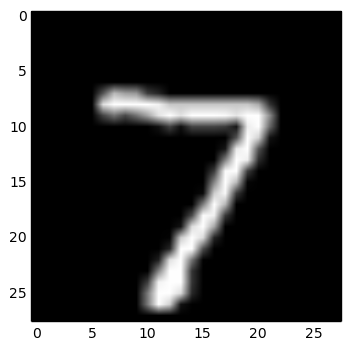

('Predicted class: ', 2)


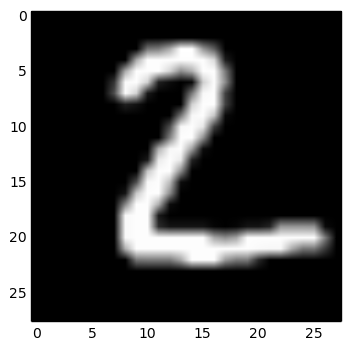

('Predicted class: ', 1)


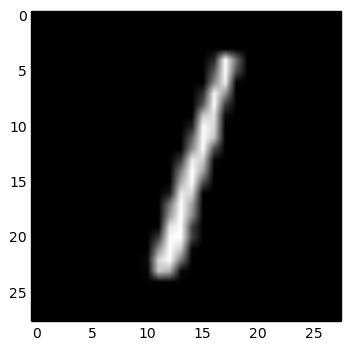

('Predicted class: ', 0)


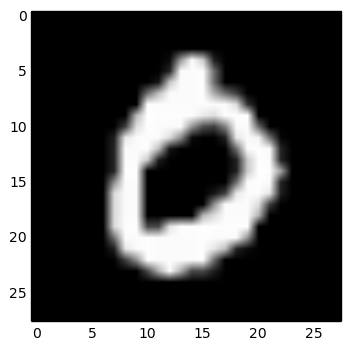

('Predicted class: ', 4)


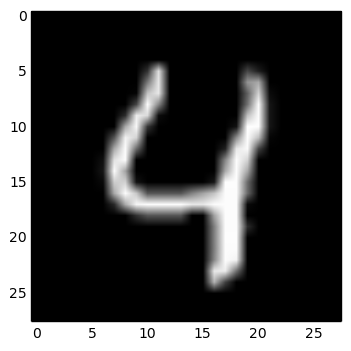

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(5):
    inp = X_test[i]
    out = y_test[i]
    pred = net.predict(inp)
    inp = np.reshape(inp,[28,28])
    print('Predicted class: ',np.argmax(pred))
    plt.imshow(inp,cmap='gray')
    plt.show()
    plt.close()